# Heart disease Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('../datasets/HeartDisease/heart.csv')

# Optional: set seaborn style
sns.set(style="whitegrid")

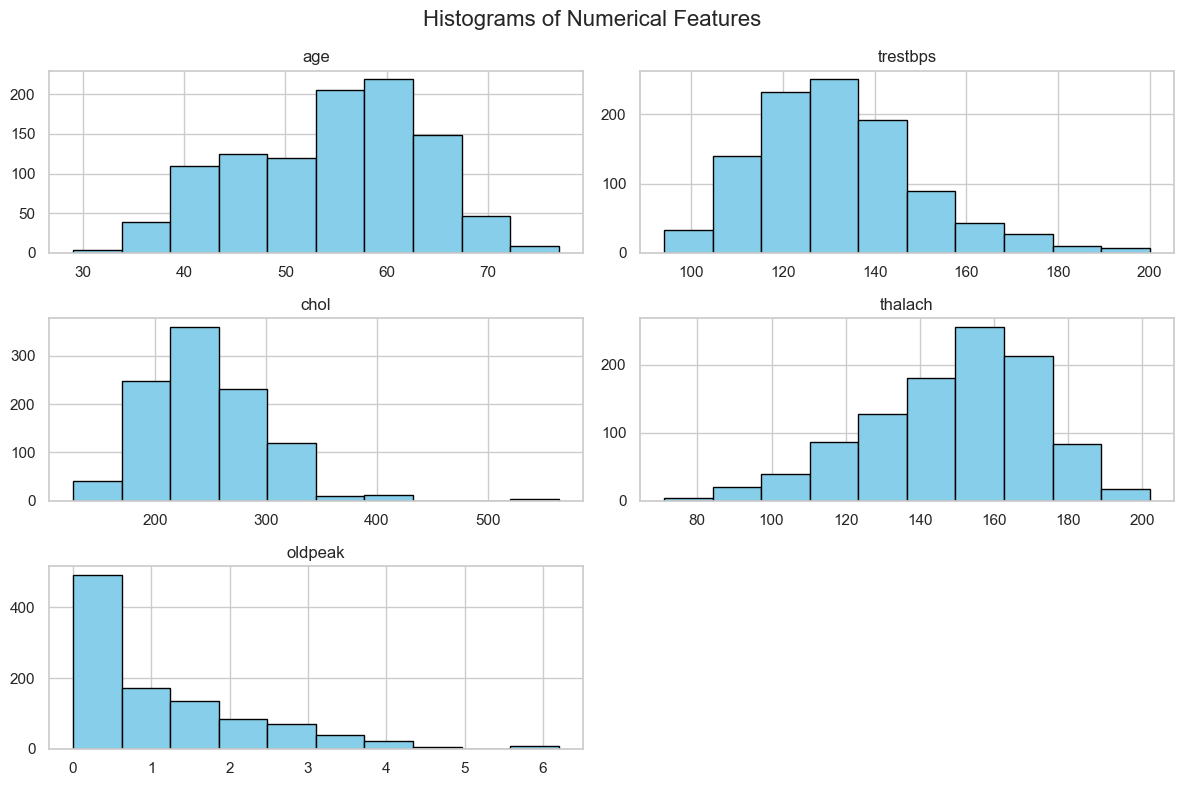

In [3]:
#Histograms
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[numerical_cols].hist(bins=10, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27260\3637150938.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='target', y='age', jitter=True, palette='Set1')


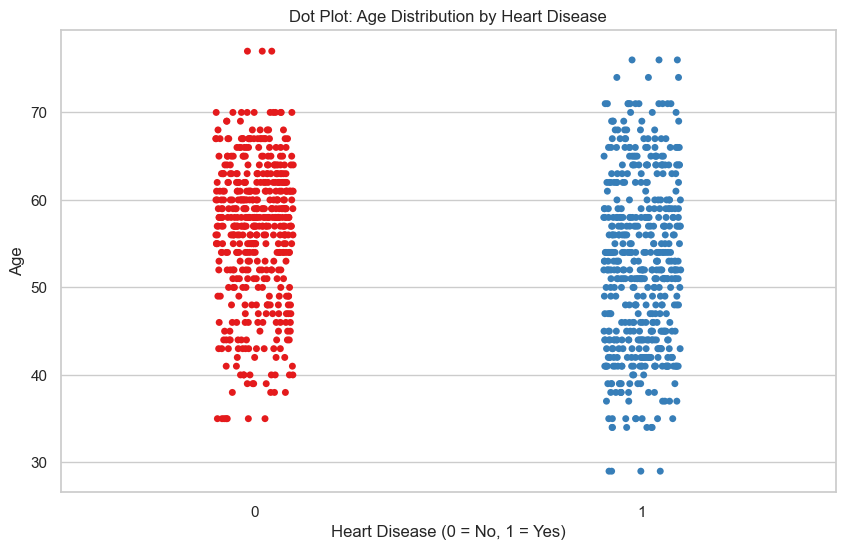

In [4]:
# Dot Plots
plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='target', y='age', jitter=True, palette='Set1')
plt.title('Dot Plot: Age Distribution by Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27260\4095198444.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='cp', y='chol', ci='sd', palette='coolwarm')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27260\4095198444.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='cp', y='chol', ci='sd', palette='coolwarm')


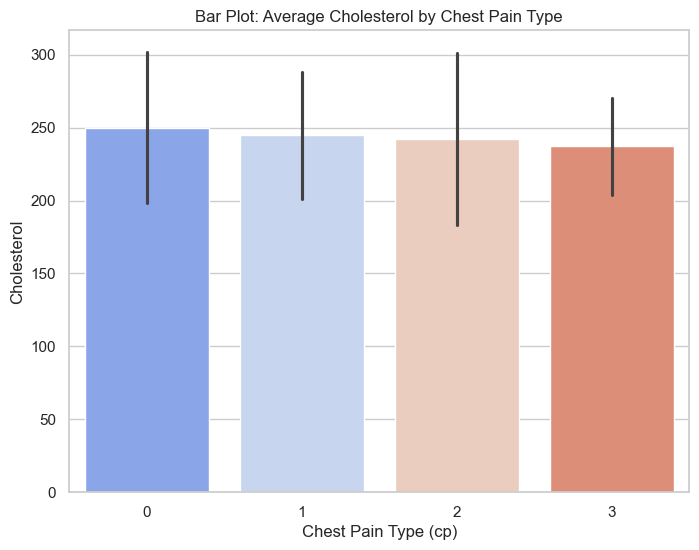

In [5]:
# Bar Plots
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='cp', y='chol', ci='sd', palette='coolwarm')
plt.title('Bar Plot: Average Cholesterol by Chest Pain Type')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Cholesterol')
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27260\2066360416.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_thalach_by_age = df.groupby('age_group')['thalach'].mean()


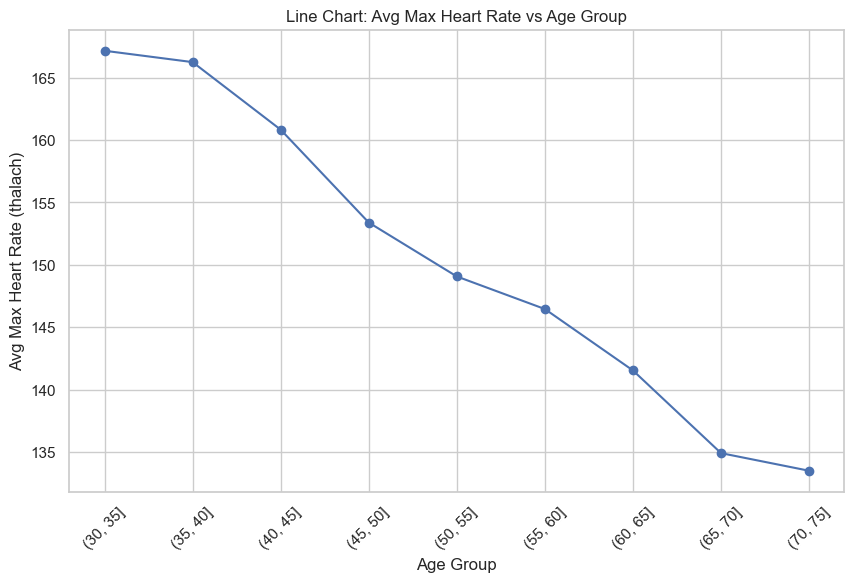

In [6]:
#Line Chart
df['age_group'] = pd.cut(df['age'], bins=range(30, 80, 5))
avg_thalach_by_age = df.groupby('age_group')['thalach'].mean()

plt.figure(figsize=(10, 6))
avg_thalach_by_age.plot(marker='o', linestyle='-')
plt.title('Line Chart: Avg Max Heart Rate vs Age Group')
plt.xlabel('Age Group')
plt.ylabel('Avg Max Heart Rate (thalach)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


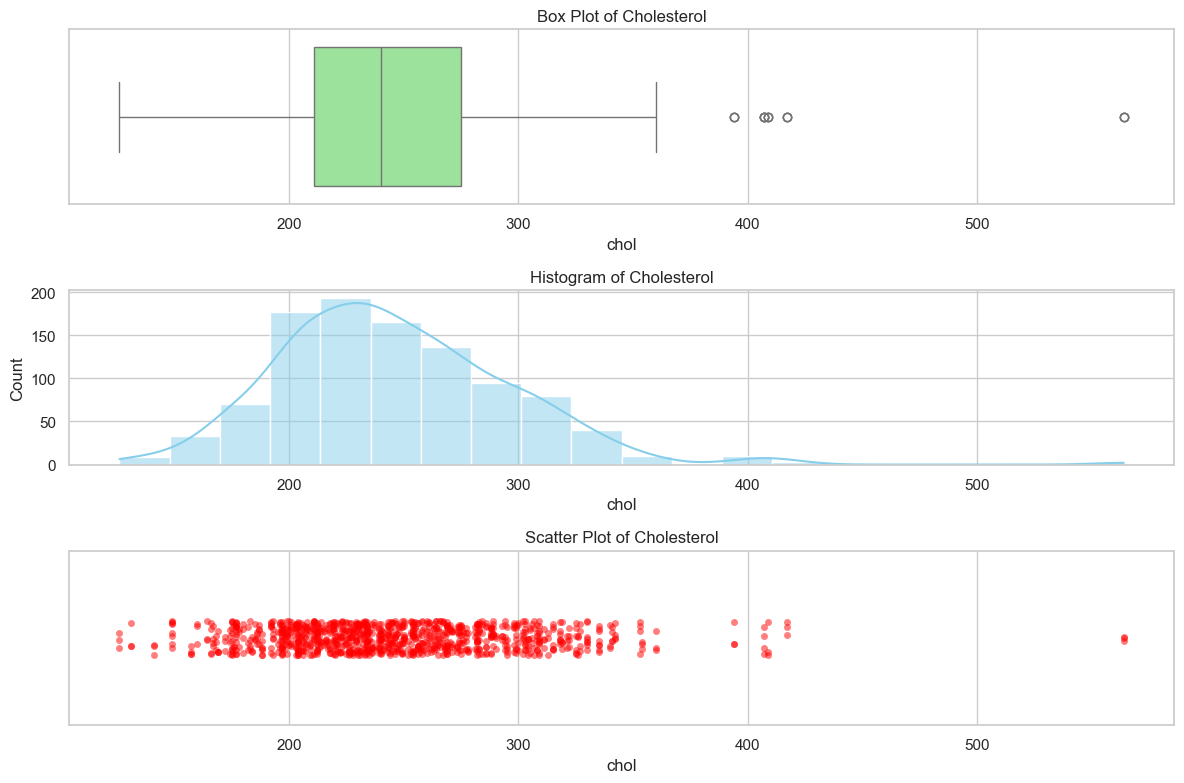

In [7]:
# Box Plot + Histogram + Scatter
plt.figure(figsize=(12, 8))

# Box plot
plt.subplot(3, 1, 1)
sns.boxplot(x=df['chol'], color='lightgreen')
plt.title('Box Plot of Cholesterol')

# Histogram
plt.subplot(3, 1, 2)
sns.histplot(df['chol'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Cholesterol')

# Scatter / strip
plt.subplot(3, 1, 3)
sns.stripplot(x='chol', data=df, color='red', alpha=0.5)
plt.title('Scatter Plot of Cholesterol')

plt.tight_layout()
plt.show()
